<a href="https://colab.research.google.com/github/Roohiashahzad/Roohia_INFO5731_Spring2020/blob/main/RoohiaShahzad_In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import os
def install_java():
 !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
 os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
 !java -version
install_java()


openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [14]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models.wrappers import LdaMallet
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
#importing stopwords module
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [6]:
google_articles_titles = pd.read_csv('/content/MachineLearning100titles.csv', encoding = "ISO-8859-1")
google_articles_titles.head(10)

,Title
0,Machine learning
1,Machine learning basics
2,Readings in machine learning
3,"Machine learning: Trends, perspectives, and pr..."
4,Optimization for machine learning
5,Encyclopedia of machine learning
6,Foundations of machine learning
7,Machine learning
8,Elements of machine learning
9,The impact of machine learning on economics


In [56]:
data = google_articles_titles['Title'].tolist()


In [60]:
#Tokenization and punctuation
data_words = []
for line in data:
   data_words.append(gensim.utils.simple_preprocess(str(line), deacc=True))  # deacc=True removes punctuations
#print(data_words[:3]) hint

In [62]:
#creating Bigrams & Trigrams models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [74]:
#removing Stopwords & getting Bigrams
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]
trigrams = [trigram_mod[bigram_mod[doc]] for doc in after_stopword_removal]

#Lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams: 
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])



#Building Dictionary, Corpus and Term Document Frequency
id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])
#id2word[0]

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[(0, 1)]]


[[('machine', 1)]]

In [76]:
#Building LDA Model with 20 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=20, 
 random_state=100,
 update_every=1,
 chunksize=100,
 passes=10,
 alpha='auto',
 per_word_topics=True)



In [77]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.135*"phase" + 0.119*"matter" + 0.024*"learning" + 0.021*"machine" + '
  '0.006*"mining" + 0.006*"air" + 0.006*"lighpath" + 0.006*"unestablishe" + '
  '0.006*"use" + 0.006*"medicine"'),
 (1,
  '0.253*"machine" + 0.124*"learn" + 0.107*"learning" + 0.056*"approach" + '
  '0.034*"optimization" + 0.023*"perspective" + 0.012*"review" + 0.012*"boost" '
  '+ 0.012*"bioinformatic" + 0.012*"classification"'),
 (2,
  '0.367*"machine" + 0.241*"learning" + 0.057*"method" + 0.056*"application" + '
  '0.029*"ensemble" + 0.017*"matter" + 0.015*"technique" + 0.015*"model" + '
  '0.015*"future" + 0.015*"management"'),
 (3,
  '0.100*"machine" + 0.089*"really" + 0.089*"work" + 0.089*"learn" + '
  '0.089*"know" + 0.088*"economist" + 0.006*"method" + 0.005*"algorithm" + '
  '0.005*"learning" + 0.004*"mining"'),
 (4,
  '0.158*"air" + 0.008*"mining" + 0.008*"library" + 0.008*"lighpath" + '
  '0.008*"unestablishe" + 0.008*"use" + 0.008*"research" + 0.008*"make" + '
  '0.008*"radiology" + 0.008*"guide

In [75]:
#Compute model perplexity & Coherece Score
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.981268815884862

Coherence Score:  0.6616088471253329


In [15]:
#setting environment path & giving Mallet path
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 



--2021-03-20 00:57:48--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  11.7MB/s    in 1.3s    

2021-03-20 00:57:49 (11.7 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [22]:
#building LDA mallet Model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [79]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.7283281768469615


In [83]:
#Compute coherence value for LDA
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    #gensimmodel20 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
    model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values



In [50]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization,start=2, limit=60, step=6)


/usr/local/lib/python3.7/dist-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


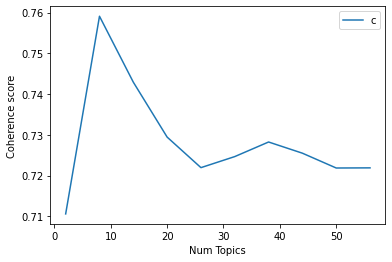

In [88]:
#show graph
limit=60; start=2; step=6;
x = range(start, limit , step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.7938
Num Topics: 8  - Coherence Value: 0.8044
Num Topics: 14  - Coherence Value: 0.7915
Num Topics: 20  - Coherence Value: 0.7914
Num Topics: 26  - Coherence Value: 0.8007
Num Topics: 32  - Coherence Value: 0.7911
Num Topics: 38  - Coherence Value: 0.8039
Num Topics: 44  - Coherence Value: 0.8031
Num Topics: 50  - Coherence Value: 0.7993
Num Topics: 56  - Coherence Value: 0.7979


In [89]:
#Printing topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.135*"phase" + 0.119*"matter" + 0.024*"learning" + 0.021*"machine" + '
  '0.006*"mining" + 0.006*"air" + 0.006*"lighpath" + 0.006*"unestablishe" + '
  '0.006*"use" + 0.006*"medicine"'),
 (1,
  '0.253*"machine" + 0.124*"learn" + 0.107*"learning" + 0.056*"approach" + '
  '0.034*"optimization" + 0.023*"perspective" + 0.012*"review" + 0.012*"boost" '
  '+ 0.012*"bioinformatic" + 0.012*"classification"'),
 (2,
  '0.367*"machine" + 0.241*"learning" + 0.057*"method" + 0.056*"application" + '
  '0.029*"ensemble" + 0.017*"matter" + 0.015*"technique" + 0.015*"model" + '
  '0.015*"future" + 0.015*"management"'),
 (3,
  '0.100*"machine" + 0.089*"really" + 0.089*"work" + 0.089*"learn" + '
  '0.089*"know" + 0.088*"economist" + 0.006*"method" + 0.005*"algorithm" + '
  '0.005*"learning" + 0.004*"mining"'),
 (4,
  '0.158*"air" + 0.008*"mining" + 0.008*"library" + 0.008*"lighpath" + '
  '0.008*"unestablishe" + 0.008*"use" + 0.008*"research" + 0.008*"make" + '
  '0.008*"radiology" + 0.008*"guide

In [29]:
#Topic Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.102077  0.136809       1        1  23.391545
2      0.243774 -0.031223       2        1  18.093606
11     0.121837 -0.019480       3        1   7.224531
14     0.119747 -0.004895       4        1   6.933577
12     0.001225  0.085571       5        1   5.424331
5      0.076011  0.021549       6        1   5.280705
6     -0.029791  0.164055       7        1   4.015780
18     0.031664 -0.080705       8        1   3.845260
13     0.001897 -0.097881       9        1   3.843710
17     0.073097 -0.052726      10        1   3.707329
9      0.073580 -0.042746      11        1   3.408907
15     0.033735 -0.054637      12        1   2.824915
19    -0.043389  0.089992      13        1   2.616050
3     -0.094211  0.077151      14        1   2.460764
7      0.011861 -0.031298      15        1   2.326040
0     -0.127029 -0.050344      16        1   1.290305
4     -0.166801 -0.036225      17        1   0.979033
8     -0.143095 -0.024322      18        1   0.777871
10    -0.143095 -0.024322      19        1   0.777871
16    -0.143095 -0.024322      20        1   0.777871, topic_info=           Term       Freq      Total Category  logprob  loglift
2      learning  40.000000  40.000000  Default  30.0000  30.0000
12        learn  15.000000  15.000000  Default  29.0000  29.0000
0       machine  68.000000  68.000000  Default  28.0000  28.0000
11    algorithm   6.000000   6.000000  Default  27.0000  27.0000
3   perspective   4.000000   4.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
25      toolkit   0.021753   1.464148  Topic20  -4.7274   0.6471
26       future   0.021753   1.464148  Topic20  -4.7274   0.6471
27  environment   0.021753   1.481011  Topic20  -4.7274   0.6356
28        torch   0.021753   1.481011  Topic20  -4.7274   0.6356
29         type   0.021753   1.442727  Topic20  -4.7274   0.6618

[1009 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
98       10  0.737490       advance
11        1  0.164613     algorithm
11        3  0.658454     algorithm
11       13  0.164613     algorithm
90        1  0.675215      analysis
...     ...       ...           ...
75        9  0.777397  unestablishe
105       9  0.777397        unifie
76        9  0.777397           use
64       14  0.762189          work
89        4  0.704591         world

[157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 12, 15, 13, 6, 7, 19, 14, 18, 10, 16, 20, 4, 8, 1, 5, 9, 11, 17])

In [85]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.444*"learning" + 0.167*"technique" + 0.056*"unifie" + 0.056*"mining" + '
  '0.056*"survey" + 0.056*"lighpath" + 0.056*"introduction" + 0.056*"air" + '
  '0.056*"prospect" + 0.000*"radiology"'),
 (1,
  '0.400*"machine" + 0.067*"impact" + 0.067*"advance" + 0.067*"real" + '
  '0.067*"medicine" + 0.067*"boost" + 0.067*"discipline" + 0.067*"theory" + '
  '0.067*"construction" + 0.067*"learning"'),
 (2,
  '0.529*"machine" + 0.235*"application" + 0.059*"data" + 0.059*"environment" '
  '+ 0.059*"practical" + 0.059*"supervised" + 0.000*"use" + 0.000*"mining" + '
  '0.000*"library" + 0.000*"unestablishe"'),
 (3,
  '0.688*"learning" + 0.062*"recognition" + 0.062*"model" + 0.062*"matter" + '
  '0.062*"element" + 0.062*"complexity" + 0.000*"radiology" + 0.000*"use" + '
  '0.000*"mining" + 0.000*"library"'),
 (4,
  '0.240*"learning" + 0.200*"algorithm" + 0.120*"review" + 0.080*"ensemble" + '
  '0.040*"pylearn" + 0.040*"practical" + 0.040*"unestablishe" + '
  '0.040*"supercomputer" + 0.040*

In [86]:
#finding dominant topic in each line
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,19.0,0.0556,"machine, mechanic, model, mining, lighpath, un...",Machine learning
1,1,4.0,0.0639,"learning, algorithm, review, ensemble, pylearn...",Machine learning basics
2,2,7.0,0.0545,"learning, economic, probabilistic, trend, patt...",Readings in machine learning
3,3,10.0,0.0648,"perspective, science, classification, system, ...","Machine learning: Trends, perspectives, and pr..."
4,4,7.0,0.0577,"learning, economic, probabilistic, trend, patt...",Optimization for machine learning
5,5,6.0,0.0556,"machine, optimization, methodological, analysi...",Encyclopedia of machine learning
6,6,15.0,0.0681,"machine, foundation, argument, neural, theory,...",Foundations of machine learning
7,7,19.0,0.0556,"machine, mechanic, model, mining, lighpath, un...",Machine learning
8,8,3.0,0.0723,"learning, recognition, model, matter, element,...",Elements of machine learning
9,9,1.0,0.0669,"machine, impact, advance, real, medicine, boos...",The impact of machine learning on economics


**Summarize the topics LDA**

Machine learning approach to boost classification and optimization of bioinformatic perspective
Machine learning technique for future model management
machine learning and mining algorithms for economist
Mining to use for library guide
Machine learning and pattern recognition for medicine classification
introduction to machine learning perspective
machine learning and computational complexity use in library datum
Mining for radiology library guide
machine learning impact on economic, construction base and library
machine learning algorithm to make sense of and supervise datum
pylearn tool for machine learning in library
Introduction to molecular science and machine learning
Machine learning using super computers and avoiding pitfalls 



## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [30]:
# Write your code here
from gensim.models import LsiModel


In [35]:
#Building model
lsamodel = LsiModel(corpus, 20, id2word)

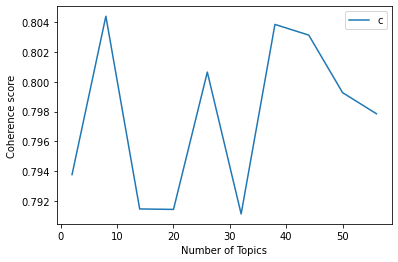

In [36]:
#computing coerence value for LSA
def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
 coherence_values = []
 model_list = []
 for num_topics in range(start, stop, step): # generate LSA model
   model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
   model_list.append(model)
   coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
   coherence_values.append(coherencemodel.get_coherence())
 return model_list, coherence_values

start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [37]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
 print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))


Num Topics: 2  - Coherence Value: 0.6145
Num Topics: 8  - Coherence Value: 0.6194
Num Topics: 14  - Coherence Value: 0.616
Num Topics: 20  - Coherence Value: 0.6158
Num Topics: 26  - Coherence Value: 0.6189
Num Topics: 32  - Coherence Value: 0.6222
Num Topics: 38  - Coherence Value: 0.6167
Num Topics: 44  - Coherence Value: 0.617
Num Topics: 50  - Coherence Value: 0.6217
Num Topics: 56  - Coherence Value: 0.617


In [38]:
pprint(lsamodel.print_topics())

[(0,
  '0.806*"machine" + 0.549*"learning" + 0.142*"learn" + 0.071*"algorithm" + '
  '0.054*"method" + 0.046*"approach" + 0.040*"perspective" + '
  '0.034*"application" + 0.029*"optimization" + 0.028*"technique"'),
 (1,
  '-0.723*"learn" + 0.573*"learning" + -0.254*"machine" + -0.120*"perspective" '
  '+ -0.078*"probabilistic" + -0.075*"research" + 0.062*"method" + '
  '-0.060*"science" + -0.058*"deep" + -0.048*"classification"'),
 (2,
  '-0.670*"algorithm" + 0.303*"learn" + 0.251*"learning" + -0.221*"understand" '
  '+ -0.208*"science" + 0.192*"method" + 0.192*"perspective" + '
  '-0.184*"machine" + -0.156*"sense" + -0.156*"datum"'),
 (3,
  '0.525*"perspective" + 0.503*"method" + 0.313*"optimization" + '
  '0.190*"survey" + -0.184*"learn" + 0.182*"ensemble" + 0.180*"application" + '
  '-0.177*"approach" + 0.140*"probabilistic" + -0.133*"learning"'),
 (4,
  '0.365*"algorithm" + 0.329*"learn" + -0.319*"application" + -0.311*"review" '
  '+ 0.302*"learning" + -0.275*"machine" + -0.251*"t

**Summarization of LSA topicsmachine learning algorithm and application for optimization**
machine learning method for probability and deep classification
machine learning algorithm to understand science of datum
machine learning algorithm to learn supervised classification
feature selecrtion approach in machine learning
technique for application of eceonometric 
Algorithm for molecular approach in understanding material science
Pattern recognition methods for classification in library
Analysis using pylearn in libraries to understand current and historical methodoligies of research



3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is
better? You should explain the reasons in details.




Latent Semantic Analysis (LSA) has lower accuracy than Latent Dirichlet allocation(LDA). The Coherence value for optimal
number of topics for LSA is 61 where as that of  LDA is 80. Since LDA has better accuracy, it can be generated to other new documents. 